IMPORTANT: Make a copy of this noteboook into your Drive.

In [1]:
!pip install requests

# NUMPY


https://numpy.org/doc/stable/

https://numpy.org/doc/stable/reference/index.html#reference

Is Numpy really fast?

In [2]:
import numpy as np
import random

# Set the size of the vectors
n = 1_000_000

# Create two random vectors
a = [random.random() for _ in range(n)]
b = [random.random() for _ in range(n)]

# Convert to NumPy arrays
np_a = np.array(a)
np_b = np.array(b)

# Plain Python multiplication
def python_multiply(x, y):
    return [a * b for a, b in zip(x, y)]

# NumPy multiplication
def numpy_multiply(x, y):
    return np.multiply(x, y)

# Time the Plain Python method
%timeit python_multiply(a, b)

# Time the NumPy method
%timeit numpy_multiply(np_a, np_b)

47.5 ms ± 981 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.08 ms ± 93.3 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# PANDAS first steps

PANDAS is the most popular library for data science (https://pandas.pydata.org/). A complete guide of this library can be found at https://pandas.pydata.org/docs/user_guide/index.html

Pandas relies on the **numpy** library for some operations, so it is convenient to import both libraries at ones.

Pandas has been integrated with matplotlib so that visualising data frames becomes an easy task with this library.

Notice that other many libraries for machine learning like **sckit-learn** as well for big data like **pySpark** have been adapted to interact/migrate into Panda's data frames. To sum up, Pandas is a standard de facto for data processing.


In [3]:
# Pandas and numpy are already installed in Colab and included in miniconda installations

import pandas as pd
import numpy as np

# SERIES

A series is the most basic elemento of Pandas and consists of an indexed list of elements.

**Note:** When using functions of imported packages, Colab will help you in knowing which arguments to use and a brief description.

In [ ]:
# A series

s = pd.Series(data=[1.5,2,2,3,4,5,6])

s

,0
0,1.5
1,2.0
2,2.0
3,3.0
4,4.0
5,5.0
6,6.0


In [ ]:
s.astype('float') + 3

,0
0,4.5
1,5.0
2,6.0
3,7.0
4,8.0
5,7.0
6,9.0


In [ ]:
## how can we get the index and type of the series?


In [ ]:
# Another series

s2 = pd.Series(data=[1.5,2,3,4,5,6,7])

s3 = s + s2

s3

,0
0,3.0
1,4.0
2,6.0
3,8.0
4,10.0
5,12.0
6,NaN


In [ ]:
## Notice that like Numpy operators are overridden to be applied over series

Visualising series (and data frames) is direct with the method .plot, which is a wrapper on the matplotlib.

(https://pandas.pydata.org/docs/user_guide/visualization.html)

<Axes: >

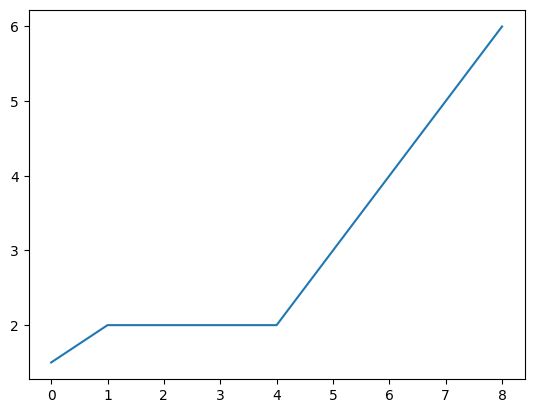

In [ ]:
# Visualización con el método plot

s.plot.line()

<Axes: >

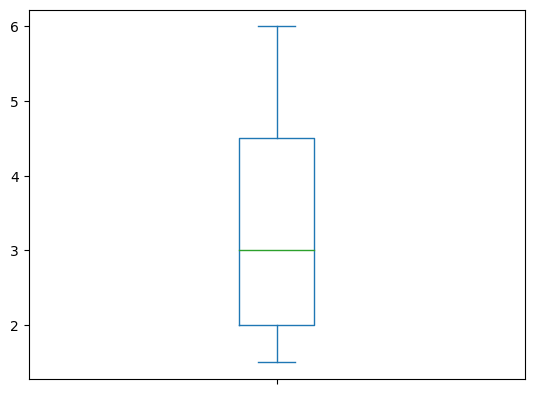

In [ ]:
s.plot.box()

We can define the series indexes by explicitely passing the elements that will serve as index.

By default indexes are natural numbers (0 ... N), but we can change the index to be any arbitrary list of numbers or strings.

In [ ]:
s = pd.Series(data=[6,5,4,3,2,1], index=['a','b','c','d','e','f'])

<Axes: >

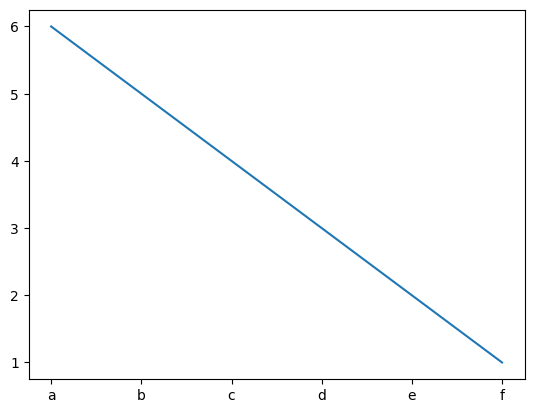

In [ ]:
s.plot.line()

<Axes: >

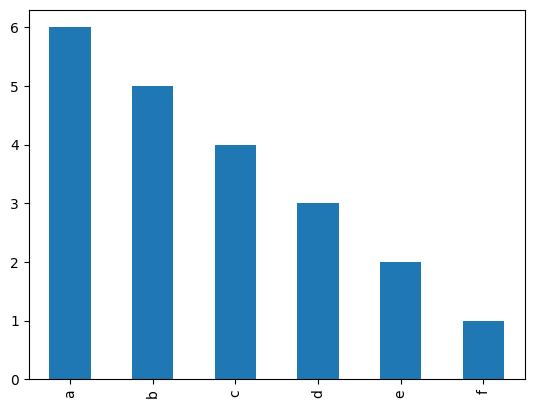

In [ ]:
s.plot.bar()

In [ ]:
# Another way to create a series is by means a dictionary

s = pd.Series(data= {'b': 1, 'a': 0, 'c': 2})

s

In [ ]:
# We can easily to transform series to numpy arrays

v = s.to_numpy()

np.log(v)

**Question:** Find two ways to transform series into Python lists.

#DATA FRAMES

DataFrames are collections of series sharing the same index (https://pandas.pydata.org/docs/user_guide/dsintro.html).

Series (columns) are organised into two axes:

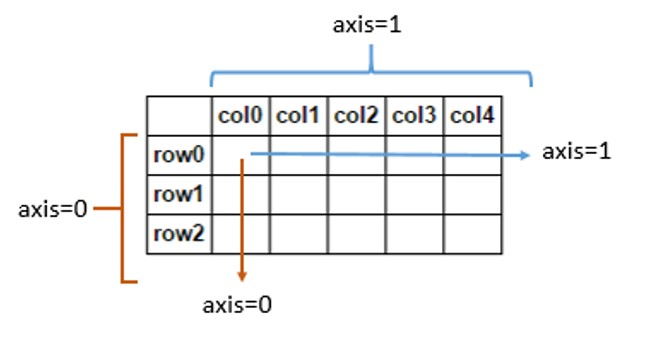





When importing with Pandas, data will be automatically converted into a dataframe. The usual way is as follows:

In [ ]:
# The first argument is required and must be a local file or a remote file (URL)

df = pd.read_csv('https://krono.act.uji.es/IDIA/airline-passengers.csv')

In [ ]:
# Data frames can be easily explored with the following methods
# Statistics

df.describe()

In [ ]:
df.info()

In [ ]:
df.dtypes

In [ ]:
df.head(2) #first two rows

In [ ]:
df.tail(1) # last row

In [ ]:
# If we want that a column becomes the index, we should include index_col='Month' in read_csv

# or once loaded, with set_index('Month')

# we can also create the index with several columns (multi-index)

df = df.set_index('Month')
#df.set_index('Month', inplace=True)

In [ ]:
df.plot.line()

In [ ]:
df.plot.box()

**Exercise 1**: Let's create a column with a true date ("Date") from the existing "Month" column. Let's complete the date by appending the day to string of Month and tgen we will change the column's datatype with [pd.to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) Finally, we can get rid of the column "Month" with [df.drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html). You can then change the index to the new column with:

`df.index = pd.to_datetime(....)`



In [ ]:
df = df.reset_index()

## Define a new column adding to Month añadiendo the string '-1' and convert the result to datetime

df['Date'] = #complete date from Month

#drop Month

#create the new index

#plot the new series



**Exercise 2**: By querying the documentation of Pandas of the `read_csv` function, find a way to directly import the data with the (incomplete) date of  `Month` as a datetime.

## Creation of Dataframe (without importing data)

In [ ]:
# From series to dataframes

serie1 = pd.Series([1., 2., 3.], index=['a', 'b', 'c'])
serie2 = pd.Series([4., 3., 2., 1.], index=['a', 'b', 'c', 'd'])

df2 = pd.DataFrame({'serie1': serie1, 'serie2': serie2}) ## con el argumento index=[...] podemos cambiar los nombres de las columnas

df2

In [ ]:
df2.plot.line(y=['serie1','serie2'])

In [ ]:
# Columns and indexes are also series, which can be modified

print(df2.index, df2.columns)


**Exercise 3**: Change the names of the series to 'S1' and 'S2', and complete properly the series 'series1'. Plot the result.

We can easlify find correlations between the numerical columns as follows:

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

df2.corr()

The columns of the dataframe can be selected in a similar way to what we saw with dictionaries.

In [ ]:
## We select the series from column 'one'

df2['serie1']

In [ ]:
## We can also add and delete columns in a similar way to dictionary keys

df2['serie3'] = 20

print(df2)

del df2['serie3'] ## deleted forever!

print(df2)

In [ ]:
df2['serie3'] = 20

df2.drop(columns='serie3', inplace=True) ## returns a copy, unless you use inplace=True

In [1]:
df2

NameError: name 'df2' is not defined

In [ ]:
## Creating new columns from existing ones is very intuitive

df2['serie3'] = df2['serie1'] * 10 + df2['serie2']

df2

Applying comparisons to series generates new series of boolean values.

In [ ]:
df2['serie1'] > df2['serie2']

Lambda functions can be applied as well to generate new columns.

In [ ]:
df2.assign(serie4 = lambda x: (x.serie1 > x.serie2).astype(float)) ## returns a copy

In [ ]:
df2

Treating null values can be applied to all the dataframe.

In [ ]:
# Remove rows with null values

df2.dropna() #Note: returns a copy, use inplace=True to modify the existing dataframe

**Question:** How can remove the columns having some null value?

In [ ]:
## Fill null values with some fix value

df2.fillna(value=0) #Note: this is not a copy

The above operations return new dataframes, and therefore do not alter the content of the original dataframe. To change the content of the dataframe we can either assign the result to the same dataframe, or use the inplace argument (more efficient).


In [ ]:
#df2 = df2.dropna()

df2.dropna(inplace=True)

In [ ]:
df2

**APPLY**: This function allows you to perform any type of transformation on any of the axes using anonymous or user-defined functions. Same as assign, returns the transformed dataframe.

In [ ]:
# The lambda function iterates over the rows (axis=1)

df2.apply(lambda x: x.serie1 * x.serie2, axis=1)

In [ ]:
df2.apply(np.sqrt) ## applied to all the dataframe

In [ ]:
# we can generate new columns with the apply function

df2['producto'] = df2.apply(lambda x: x['serie1'] * x['serie2'], axis=1)

df2.head()

In [ ]:
## or we can use apply to just one specific column

df2['dos_mayor_3'] = df2['serie2'].apply(lambda x: 1 if x > 3 else 0)

df2.head()

**Question:** Can we use apply over a subset of columns? How can we do this?

In [ ]:
# For columns (axis 0), we iterate over the columns (series)

sumas = df2.apply(lambda x: np.sum(x) )

## EXERCISES

**Exercise 4.** Numpy allows you to create arrays of random numbers with the random object (see the attached links). Create a dataframe with three series and column names that you want. Then create an extra column with the sum of the previous columns (called "sum"), and another column called "sign_sum" where it indicates whether the sign of the sum is positive (1) or negative (-1).

https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html

https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html




**Exercise 5.** Using the *apply* function and the previous dataframe, normalize the series so that they always add up to one.

In [ ]:
# totals per column

# divide series per totals

**Exercise 6.** With the `shift` function you can shift a series according to the specified period. From the passenger dataframe (df), add a shifted series and calculate the **autocorrelation** between the original and the shifted series.

In [ ]:
# add the shited series as a new column

# calculate the correlation

**Note**: You can use the random functions of numpy to generate the necessary data for the exercises.

In [ ]:
# randint between 100 and 300
100 + np.random.randint(200, size=(5,))

In [ ]:
#rand between 100 and 300
100 + np.random.rand(5) * 200

# CHALLENGE EXERCISE

This exercise is optional and it is not necessary to include it in the weekly deliverable. We will work all together to find out the solution.

If you don't have reported your skills, please fill in the following Google form:

https://forms.gle/PkkagVDxPwrozg4M6


**Problem:** Given the results of the questionaire about the students' Data Science skills (see link below), you have to import and transform the results reported of the Google Sheet to obtain similar visualizations to those provided by Google Forms. Additionally, you have to calculate the correlations between the different skills.

https://docs.google.com/spreadsheets/d/1-Cw9X9zLtEVuCn611cDltmFUSAdI6BR7AkMXYDMOg6o/edit?usp=drive_link

In [ ]:
'''
  TASKS:
  1. Connect and import data from a shared Google Sheet (or download it as a CSV file)
  2. Create a new dataframe with the imported data
  4. Calculate statistics and visualize the summarised data
'''
